In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
451257,2020-08-20,Hamilton,Iowa,19079.0,242,2
91092,2020-04-26,Jasper,Missouri,29097.0,23,0
93406,2020-04-27,Boyd,Kentucky,21019.0,33,3
1446,2020-03-12,Adams,Indiana,18001.0,1,0
283365,2020-06-28,Bexar,Texas,48029.0,10159,109
49784,2020-04-11,Lincoln,Missouri,29113.0,26,1
197010,2020-06-01,Pulaski,Arkansas,5119.0,903,34
511592,2020-09-07,Northumberland,Virginia,51133.0,101,5
130627,2020-05-10,Burke,Georgia,13033.0,107,4
321619,2020-07-10,Appomattox,Virginia,51011.0,46,0


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
120998,2020-05-06,Charlottesville city,Virginia,51540.0,64,2,0.0,1.71
328004,2020-07-12,Charlottesville city,Virginia,51540.0,276,7,6.0,5.57
118034,2020-05-05,Charlottesville city,Virginia,51540.0,64,2,1.0,1.86
289964,2020-06-30,Charlottesville city,Virginia,51540.0,212,3,1.0,5.14
350359,2020-07-19,Albemarle,Virginia,51003.0,616,10,8.0,9.14
450103,2020-08-19,Albemarle,Virginia,51003.0,921,16,5.0,9.29
246056,2020-06-16,Albemarle,Virginia,51003.0,293,8,3.0,5.00
443670,2020-08-17,Charlottesville city,Virginia,51540.0,560,15,0.0,2.43
353584,2020-07-20,Charlottesville city,Virginia,51540.0,361,7,18.0,10.86
408213,2020-08-06,Charlottesville city,Virginia,51540.0,505,15,1.0,7.71


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
1729,".Saline County, Nebraska",14224.0,Saline,Nebraska
585,".Nez Perce County, Idaho",40408.0,Nez Perce,Idaho
1779,".Cumberland County, New Jersey",149527.0,Cumberland,New Jersey
1326,".Chisago County, Minnesota",56579.0,Chisago,Minnesota
1716,".Nance County, Nebraska",3519.0,Nance,Nebraska
1214,".Wicomico County, Maryland",103609.0,Wicomico,Maryland
1753,".Humboldt County, Nevada",16831.0,Humboldt,Nevada
1598,".Beaverhead County, Montana",9453.0,Beaverhead,Montana
439,".Emanuel County, Georgia",22646.0,Emanuel,Georgia
1007,".Bullitt County, Kentucky",81676.0,Bullitt,Kentucky


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
166,2020-09-03,Albemarle,Virginia,51003.0,1060,19,8.0,10.00,".Albemarle County, Virginia",109330.0,9.146620
167,2020-09-04,Albemarle,Virginia,51003.0,1067,19,7.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
168,2020-09-05,Albemarle,Virginia,51003.0,1079,19,12.0,8.14,".Albemarle County, Virginia",109330.0,7.445349
169,2020-09-06,Albemarle,Virginia,51003.0,1086,19,7.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
170,2020-09-07,Albemarle,Virginia,51003.0,1093,19,7.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
171,2020-09-08,Albemarle,Virginia,51003.0,1096,19,3.0,7.71,".Albemarle County, Virginia",109330.0,7.052044
172,2020-09-09,Albemarle,Virginia,51003.0,1101,19,5.0,7.00,".Albemarle County, Virginia",109330.0,6.402634
173,2020-09-10,Albemarle,Virginia,51003.0,1110,19,9.0,7.14,".Albemarle County, Virginia",109330.0,6.530687
174,2020-09-11,Albemarle,Virginia,51003.0,1122,19,12.0,7.86,".Albemarle County, Virginia",109330.0,7.189244
175,2020-09-12,Albemarle,Virginia,51003.0,1128,19,6.0,7.00,".Albemarle County, Virginia",109330.0,6.402634


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
346,2020-09-03,Charlottesville city,Virginia,51540.0,732,22,33.0,18.29,".Charlottesville city, Virginia",47266.0,38.695891
347,2020-09-04,Charlottesville city,Virginia,51540.0,758,23,26.0,19.29,".Charlottesville city, Virginia",47266.0,40.811577
348,2020-09-05,Charlottesville city,Virginia,51540.0,768,23,10.0,17.14,".Charlottesville city, Virginia",47266.0,36.262853
349,2020-09-06,Charlottesville city,Virginia,51540.0,787,23,19.0,16.14,".Charlottesville city, Virginia",47266.0,34.147167
350,2020-09-07,Charlottesville city,Virginia,51540.0,789,23,2.0,15.43,".Charlottesville city, Virginia",47266.0,32.645030
351,2020-09-08,Charlottesville city,Virginia,51540.0,797,23,8.0,15.86,".Charlottesville city, Virginia",47266.0,33.554775
352,2020-09-09,Charlottesville city,Virginia,51540.0,819,24,22.0,17.14,".Charlottesville city, Virginia",47266.0,36.262853
353,2020-09-10,Charlottesville city,Virginia,51540.0,833,24,14.0,14.43,".Charlottesville city, Virginia",47266.0,30.529345
354,2020-09-11,Charlottesville city,Virginia,51540.0,867,24,34.0,15.57,".Charlottesville city, Virginia",47266.0,32.941226
355,2020-09-12,Charlottesville city,Virginia,51540.0,899,24,32.0,18.71,".Charlottesville city, Virginia",47266.0,39.584479


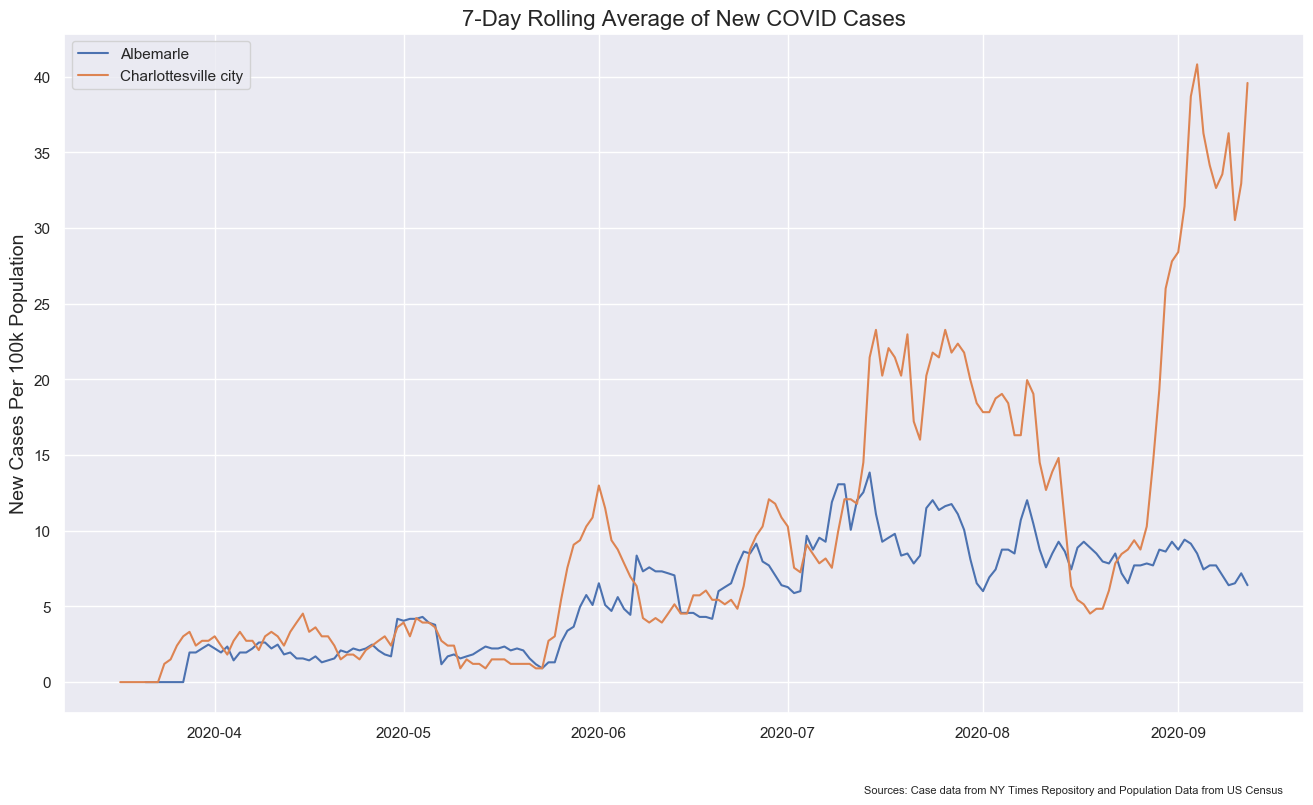

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')